# Assignment 6 - Logistic Regression without using any libraries

(20 points)

### Add your name(s) and EIDs below
- Student Name: Juan Chavarria
- Student UT EID: jac23763

### Grading clarifications
1. Before you submit:
    - **Please do not change or remove any variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
    - **Please don't use any other libraries** besides those provided in `requirements.txt`, and those [built in to Python](https://docs.python.org/3.8/library/index.html).
2. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow the points under 1). There is also some built-in tolerance in case any of your values are off.
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

**You are only allowed to use the below libraries that are imported. No other libraries should be used in this assignment.**

In [1]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with a dataset of patients. 
We have access to 303 patients' data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type
* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**RestECG**: resting electrocardiographic results
* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**MaxHR:** The person’s maximum heart rate achieved

**ExAng:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

**Slope:** the slope of the peak exercise ST segment
* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia 
* Value 0: NULL (dropped from the dataset previously
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Q1
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task. 

(**4 points** - 3 points for code, 1 point for cost visualization)

<!-- BEGIN QUESTION -->



In [3]:
# Construct the full dataset.
heart_df.loc[heart_df['Target'] == 'No', 'Target'] = 0
heart_df.loc[heart_df['Target'] == 'Yes', 'Target'] = 1

X = heart_df[['Age','Sex','Chol']].values.reshape(-1, 3)
y = heart_df[['Target']].values.reshape(-1).astype(int)

In [4]:
# Implement the below helper functions to set up your logistic regression.
def train_test_split(X, y, testing_size=0.2):
    """Split the dataset into a training and testing set.
    """
    from sklearn.model_selection import train_test_split as tts
    X_train, X_test, y_train, y_test = tts(X,y, test_size=testing_size, random_state = 123)
    
    return X_train, X_test, y_train, y_test

def logistic_regression(X, weights):
    """Use the logistic regression equation to predict over all
    samples in the X array. We have to do it for each of the three
    features (or four with intercept) using our weights array.
    """
    pred = sigmoid(X.dot(weights)) >= 0.5
    return pred.astype(int)

def gradient(X, y, pred):
    """Get the MSE gradient for each variable in the set.
    Since each feature depends on its column in i, we
    get three (or four with intercept) different gradients
    for each of the coefficients/features.
    """
    n, d = X.shape
    x_dot_pred = X.dot(pred)
    gradient = (1.0/(n)) * (sigmoid(x_dot_pred) - y).T.dot(X)

    return gradient

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def cost(X, y, pred):
    n, d = X.shape
    x_dot_pred = X.dot(pred)
    cost = (1.0/n) * (-y.T.dot(np.log(sigmoid(x_dot_pred))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_pred))))

    return cost

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

# Set parameters:
# lr = learning rate
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights
lr = .00012
iterations = 100
costs = []
weights = np.zeros(3)
iterCount = []

# Perform your logistic regression.
for i in range(iterations):
    
    cost_val = cost(X_train, y_train, weights)
    grad_val = gradient(X_train, y_train, weights)
    
    #print('cost:', cost_val)
    weights = weights - (lr * grad_val)
    
    iterCount.append(i)
    costs.append(cost_val)

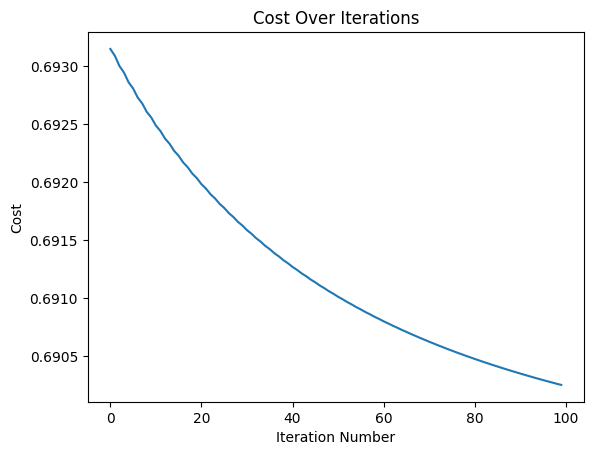

In [6]:
# Visualize your costs.
plt.plot(iterCount, costs)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.show()

<!-- END QUESTION -->

# Q2

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. (**4 points**)

<!-- BEGIN QUESTION -->



In [7]:
def precision(y, pred):
    # false pos have negative true conditions and positive pred
    false_p = sum((y == 0) & (pred == 1))

    # true posi have positive results and predictions
    true_pos = sum((y == 1) & (pred == 1))

    precision = true_pos/(true_pos + false_p)
    return precision

def recall(y, pred):
    """Calculate recall.
    """
    # false neg have positive true condition and negative pred
    false_n = sum((y == 1) & (pred == 0))
    # true pos have positive results and predictions
    true_pos = sum((y == 1) & (pred == 1))

    recall = true_pos/(true_pos + false_n)
    return recall
    
def f1_score(y, pred):
    """Calculate F1 score.
    """
    prec = precision(y, pred)
    rec = recall(y, pred)
    f1_score = 2*((prec*rec)/(prec+rec))
    return f1_score

def accuracy(y, pred):
    """Calculate accuracy.
    """
    correct = np.sum(pred == y)
    accuracy = correct/y_test.size
    return accuracy

In [8]:
pred = logistic_regression(X_test, weights)

cost_val = costs[-1]
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost_val)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 0.6902506352249561
    Accuracy : 57.377049180327866 %
    Precision: 75.0 %
    Recall   : 10.714285714285714 %
    F1 score : 0.1875


<!-- END QUESTION -->

# Q3

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)


Answer: Adding the intercept barely changed the results while keeping the learning rate constant. The difference is about 5 decimals places to the right, meaning it can be ignored and safe to assume that it didn't affect the results much. This might be because we set up our intercept to be constant for all the data points, so not much changes as the results are minimized. Even when we changed the learning rates, both plots had very similar results and the weights were very close (the y-intercept was small).

<!-- BEGIN QUESTION -->



In [9]:
# Modify your dataset so that it supports a constant y-intercept term
# (Hint: what column would we want to add to our dataset matrix, so that when 
#        multiplied by the y-intercept, we get the same value every time?)
X_mod = heart_df
X_mod['yint'] = np.ones(len(X_mod))

X_modified = X_mod[['yint','Age','Sex','Chol']].values.reshape(-1, 4)

# Split dataset (with intercept)
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, 0.2)

# Set parameters, just like in Q1:
# lr = learning rate
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (but now with a y-intercept weight)
lr = 0.00012
iterations = 100
costs = []
iterCount = []
weights = np.zeros(4)

# Perform your logistic regression.
for i in range(iterations):

    cost_val = cost(X_train, y_train, weights)
    grad_val = gradient(X_train, y_train, weights)
    
    #print('cost:', cost_val)
    weights = weights - (lr * grad_val)
    
    iterCount.append(i)
    costs.append(cost_val)

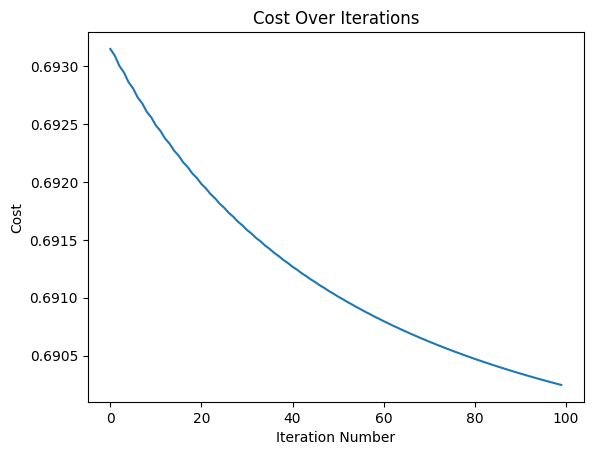

In [10]:
# Visualize your costs.
plt.plot(iterCount, costs)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.show()

In [11]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost_val2 = costs[-1]
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost_val2)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 0.690248073463184
    Accuracy : 57.377049180327866 %
    Precision: 75.0 %
    Recall   : 10.714285714285714 %
    F1 score : 0.1875


<!-- END QUESTION -->

# Q4
Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

* Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations.
* Describe the results. Did you stop earlier than 100 iterations? 

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)

Answer: We played around with the learning rate of the bold driver because we wanted to see how fast it could converge. Since the learning rate is adjusted every iteration, we could start off with a larger value than the one in the previous questions. The cost visualization tells us that the bold driver causes more unstable descent. In fact, our algorithm stopped before we could see a fully developed, stable plateu near the tail of the plot. Also, our cost ended up being higher than our first cost, which shows that our system has more error than we started with, but it might reduce overfitting. With this in mind, our accuracy and precision scores went down (about 2% and 24% respectively), but our recall value went up by 43% as well as our F1 score (.32 increase) meaning that our model should be performing better.

<!-- BEGIN QUESTION -->



In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

# Set parameters:
# lr = learning rate (*Update this variable when implementing your bold driver.*)
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (*no* y-intercept)
lr = 0.01
iterations = 100
iterCount = []
costs = []

weights = np.zeros(3)

# Perform your logistic regression, with a bold driver on the learning rate.
for i in range(iterations):

    cost_val = cost(X_train, y_train, weights)
    grad_val = gradient(X_train, y_train, weights)

    if i > 0:
        if abs(oldcost - cost_val) <= 0.001:
            break
    
    #print('cost:', cost_val)
    weights = weights - (lr * grad_val)
    
    if i > 0:
        if (oldcost - cost_val) > 0:
            lr = 1.05*lr
        elif (oldcost - cost_val) < 0:
            lr = 0.5*lr

    iterCount.append(i)
    costs.append(cost_val)
    oldcost = cost_val

C:\Users\mleok\AppData\Local\Temp\ipykernel_18748\1403615746.py:37: RuntimeWarning: divide by zero encountered in log
  cost = (1.0/n) * (-y.T.dot(np.log(sigmoid(x_dot_pred))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_pred))))


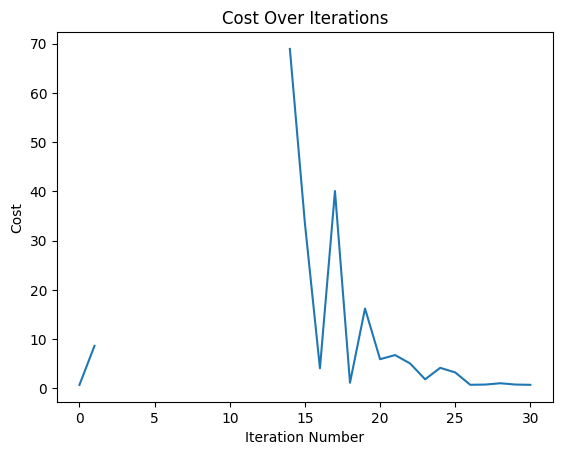

In [13]:
# Visualize your costs.
plt.plot(iterCount, costs)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.show()

In [14]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost_val3 = costs[-1] 
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('\nTesting set:')
print('    Cost     :', cost_val3)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)


Testing set:
    Cost     : 0.7114111203203436
    Accuracy : 55.73770491803278 %
    Precision: 51.724137931034484 %
    Recall   : 53.57142857142857 %
    F1 score : 0.5263157894736843


<!-- END QUESTION -->

# Q5

Implement the L2 norm regularization.

Modify your Cost and gradient to implement the l2 norm regularization. 
Repeat the steps taken in prior tasks and describe your result. 

* Use a y-intercept.
* Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score. 
* **Optional**: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
* **Optional**: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)

Answer: The L2 norm regularization had the same result as the model with the y-intercept, except the y-intercept model had a slightly lesser cost after 100 iterations than the L2 model. This is a result of the lambda used. Since the lambda we used was 1, the costs were being updated by the full sum of the weights, rather than a product of the weights times a number less than 1. In all, the y-intercept model is better because it got the same metrics while using a lesser cost. 

In [15]:
# Determine the ridge regression gradient.
def gradient_ridge(lamb, weights):
    """Compute the gradient of the ridge, which we will include in our weight
    update in addition to the weighted gradient of each coefficient."""
    grad_ridge = 2*lamb*(weights)
    return grad_ridge

In [16]:
# Modify your dataset so that it supports a constant y-intercept term
# (Hint: what column would we want to add to our dataset matrix, so that when 
#        multiplied by the y-intercept, we get the same value every time?)
X_mod = heart_df
X_mod['yint'] = np.ones(len(X_mod))

X_modified = X_mod[['yint','Age','Sex','Chol']].values.reshape(-1, 4)

# Split dataset (with intercept)
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, 0.2)

# Set parameters, just like in Q1:
# lr = learning rate
# lamb = lambda weight for L2 regularization (*new*)
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (but now with a y-intercept weight)
lr = 0.00012
lamb = 1 # Lambda weight for L2 regularization.
iterations = 100
costs = []
iterCount = []
weights = np.zeros(4)

# Perform your logistic regression, with L2 norm regularizaiton.
for i in range(iterations):

    cost_val = cost(X_train, y_train, weights) + (lamb*sum(np.square(weights)))
    grad_val = gradient(X_train, y_train, weights)
    ridge_val = gradient_ridge(lamb, weights)
    
    #print('cost:', cost_val)
    weights = weights - (lr * (grad_val+ ridge_val))
    
    iterCount.append(i)
    costs.append(cost_val)

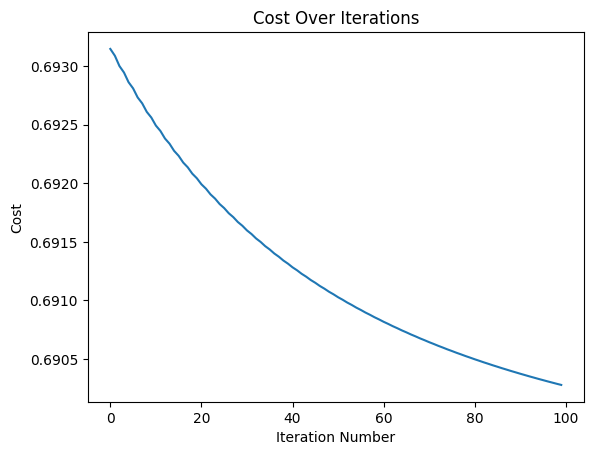

In [17]:
# Visualize your costs.
plt.plot(iterCount, costs)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.show()

In [18]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost = costs[-1]
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('\nTesting set:')
print('    Cost     :', cost)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)


Testing set:
    Cost     : 0.6902780211300424
    Accuracy : 57.377049180327866 %
    Precision: 75.0 %
    Recall   : 10.714285714285714 %
    F1 score : 0.1875


<!-- END QUESTION -->

